# Assess Bot Impact on Impeachment Analysis
This code will let you analyze the bot impact that has been calculated for each day during the impeachment

In [ ]:
#from assess_helper import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import sparse
import sys
import networkx as nx
import os
import seaborn as sns

## Mount Google Drive

The data files are located in  the Google Drive path.  This is also where we will save network files and assess results.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


path = '/content/drive/My Drive/NeuralNetworkOpinions/Impeachment/'



Mounted at /content/drive


In [ ]:
path_dates = path+"daily_active_edge_friend_graphs_v5/"
Dates = sorted(os.listdir(path_dates))
print(f"Impeachment data for {len(Dates)} days\n{Dates[0]} to {Dates[-1]}")


Impeachment data for 58 days
2019-12-20 to 2020-02-15


## Helper functions

These functions collect basic statistics about the tweets, users, and bots in each day.

In [ ]:
def bot_reach(df):
  Bots0 = set(df.screen_name[(df.bot==1) & (df.opinion_tweet<0.5)].values)
  Bots1 = set(df.screen_name[(df.bot==1) & (df.opinion_tweet>0.5)].values)
  Followers0 = []
  Followers1 = []
  for index,row in df.iterrows():
    u = row.screen_name
    friends = row.friend_names.split(",")
    for friend in friends:
      if friend in Bots0:
        Followers0.append(u)
      if friend in Bots1:
        Followers1.append(u)
  
  reach = len(set(Followers0 + Followers1))
  reach0 = len(set(Followers0))
  reach1 = len(set(Followers1))


  return (reach,reach0,reach1)

def date_data(df,df_assess):
  #mean shift with and without bots
  mu_bot = df_assess.opinion_equilibrium_bot.mean()
  mu_nobot = df_assess.opinion_equilibrium_nobot.mean()
  std_bot = df_assess.opinion_equilibrium_bot.std()
  std_nobot = df_assess.opinion_equilibrium_nobot.std()

  #human count
  nh_0 = len(df[(df.bot==0) & (df.opinion_tweet<0.5)])
  nh_1 = len(df[(df.bot==0) & (df.opinion_tweet>0.5)])
  nh = len(df[df.bot==0])

  #bot count
  nbots_0 = len(df[(df.bot==1) & (df.opinion_tweet<0.5)])
  nbots_1 = len(df[(df.bot==1) & (df.opinion_tweet>0.5)])
  nbots = len(df[df.bot==1])


  n = len(df)
  nnonstub = len(df_assess[df_assess.stubborn==0])
  nstub = len(df_assess[df_assess.stubborn==1])

  #non-bot tweets
  ntweets_0 = df.rate[(df.bot==0) & (df.opinion_tweet<0.5)].sum()
  ntweets_1 = df.rate[(df.bot==0) & (df.opinion_tweet>0.5)].sum()
  ntweets = df.rate[df.bot==0].sum()
  #bot tweets
  ntweets_bot0 = df.rate[(df.bot==1) & (df.opinion_tweet<0.5)].sum()
  ntweets_bot1 = df.rate[(df.bot==1) & (df.opinion_tweet>0.5)].sum()
  ntweets_bot = df.rate[df.bot==1].sum()

  (reach,reach0,reach1) = bot_reach(df)

  date_dict ={'date':date,'num_human':nh,'num_human_0':nh_0, 'num_human_1':nh_1,
                          'num_bot':nbots,'num_bot_0':nbots_0, 'num_bot_1':nbots_1,
                          'num_human_tweets':ntweets,'num_human_0_tweets':ntweets_0, 'num_human_1_tweets':ntweets_1,
                          'num_bot_tweets':ntweets_bot,'num_bot_0_tweets':ntweets_bot0, 'num_bot_1_tweets':ntweets_bot1,
                          'mean_opinion_equilibrium_nobot':mu_nobot,'mean_opinion_equilibrium_bot':mu_bot,
                          'std_opinion_equilibrium_nobot':std_nobot,'std_opinion_equilibrium_bot':std_bot,
                          'reach_bot':reach,'reach_bot_0':reach0,'reach_bot_1':reach1}
  return date_dict



In [ ]:
%%time

Data = []

for cnt,date in enumerate(Dates):
  #if cnt>3:break
  print("Assess for %s (%s of %s)"%(date,cnt,len(Dates)))

  path_data = path_dates+ '%s/'%date
  model_name = 'BERT_Impeachment_800KTweets'
  node_pred_filename = path_data+"nodes_%s.csv"%model_name
  node_filename = path_data+"nodes.csv"
  assess_filename = path_data+"assess.csv"

  print("\tLoading data")
  df_nodes = pd.read_csv(node_filename)
  df_nodes.reset_index()
  df_nodes_pred = pd.read_csv(node_pred_filename)

  print("\tMerge dataframes")
  df = df_nodes.merge(df_nodes_pred,how ='inner')
  df["bot"] = df["bot"].astype(int)


  df_assess = pd.read_csv(assess_filename)
  #df_opinions = df.merge(df_assess,how='inner')

  print(f"\tGet basic stats for each day")
  date_dict = date_data(df,df_assess)
  Data.append(date_dict)
  print(f"\tSave data to csv")
  df_date = pd.DataFrame.from_dict(Data)
  df_date.to_csv(path+"assess_all_days.csv")


print(df_date.head())

Assess for 2019-12-20 (0 of 58)
	Loading data
	Merge dataframes
	Get basic stats for each day
	Save data to csv
Assess for 2019-12-21 (1 of 58)
	Loading data
	Merge dataframes
	Get basic stats for each day
	Save data to csv
Assess for 2019-12-22 (2 of 58)
	Loading data
	Merge dataframes
	Get basic stats for each day
	Save data to csv
Assess for 2019-12-23 (3 of 58)
	Loading data
	Merge dataframes
	Get basic stats for each day
	Save data to csv
Assess for 2019-12-24 (4 of 58)
	Loading data
	Merge dataframes
	Get basic stats for each day
	Save data to csv
Assess for 2019-12-25 (5 of 58)
	Loading data
	Merge dataframes
	Get basic stats for each day
	Save data to csv
Assess for 2019-12-26 (6 of 58)
	Loading data
	Merge dataframes
	Get basic stats for each day
	Save data to csv
Assess for 2019-12-27 (7 of 58)
	Loading data
	Merge dataframes
	Get basic stats for each day
	Save data to csv
Assess for 2019-12-28 (8 of 58)
	Loading data
	Merge dataframes
	Get basic stats for each day
	Save data

In [ ]:
df_date.head()

,date,num_human,num_human_0,num_human_1,num_bot,num_bot_0,num_bot_1,num_human_tweets,num_human_0_tweets,num_human_1_tweets,num_bot_tweets,num_bot_0_tweets,num_bot_1_tweets,mean_opinion_equilibrium_nobot,mean_opinion_equilibrium_bot,std_opinion_equilibrium_nobot,std_opinion_equilibrium_bot,reach_bot,reach_bot_0,reach_bot_1
0,2019-12-20,503903,295379,208524,19283,8198,11085,1087708,530176,557532,378413,124678,253735,0.542851,0.449532,0.286915,0.349559,214257,118180,128641
1,2019-12-21,57928,30841,27087,3357,1464,1893,138616,66298,72318,62437,25470,36967,0.332839,0.390528,0.341190,0.420334,25213,11604,14083
2,2019-12-22,336854,217305,119549,18823,8191,10632,714083,425533,288550,287017,137321,149696,0.421220,0.368557,0.313842,0.376283,174999,102455,96409
3,2019-12-23,278239,157262,120977,19165,8241,10924,687508,347688,339820,318778,132004,186774,0.510164,0.464549,0.293503,0.385294,179874,102450,105568
4,2019-12-24,217367,107533,109834,18840,8027,10813,545189,246658,298531,269204,108356,160848,0.527882,0.528394,0.305772,0.401851,156217,82713,92591


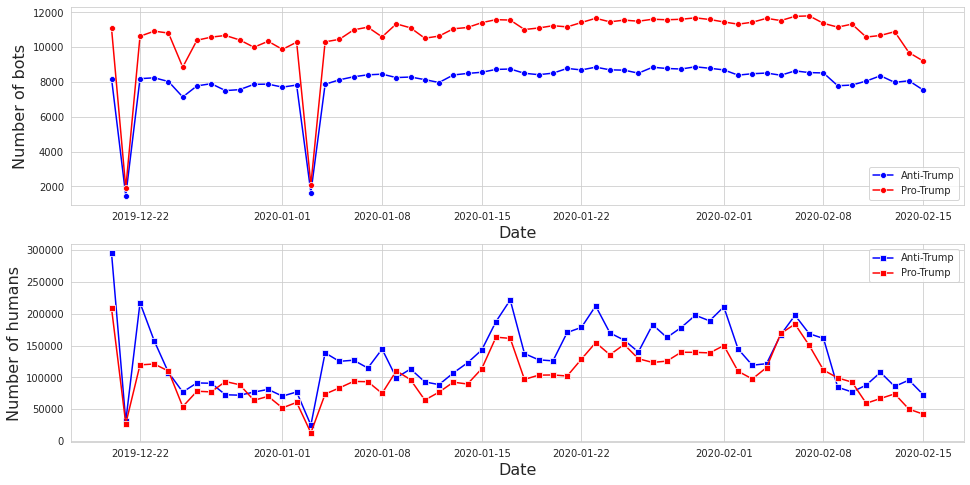

In [ ]:
## plot user vs date, tweets vs date, separated by sentiment
format='%Y%m%d'
df_date['datetime'] = pd.to_datetime(df_date.date)

#supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(16, 8))
plt.subplot(2,1,1)
#sns.lineplot(data = df_date,x='datetime', y = 'num_bot',ls= 'solid',marker= "o",label = 'Number of bots',color = 'purple')
sns.lineplot(data = df_date,x='datetime', y = 'num_bot_0',ls= 'solid',marker= "o",label = 'Anti-Trump',color = 'blue')
sns.lineplot(data = df_date,x='datetime', y = 'num_bot_1',ls= 'solid',marker= "o",label = 'Pro-Trump',color = 'red')
plt.ylabel("Number of bots",fontsize = 16)
plt.xlabel("Date",fontsize = 16)
plt.legend()

plt.subplot(2,1,2)
#sns.lineplot(data = df_date,x='datetime', y = 'num_human',ls= 'solid',marker= "s",label = 'Number of users',color = 'purple')
sns.lineplot(data = df_date,x='datetime', y = 'num_human_0',ls= 'solid',marker= "s",label = 'Anti-Trump',color = 'blue')
sns.lineplot(data = df_date,x='datetime', y = 'num_human_1',ls= 'solid',marker= "s",label = 'Pro-Trump',color = 'red')

plt.ylabel("Number of humans",fontsize = 16)
plt.xlabel("Date",fontsize = 16)
plt.legend()
plt.show()

## Plot number of tweets per day, humans vs bots, pro vs anti Trump





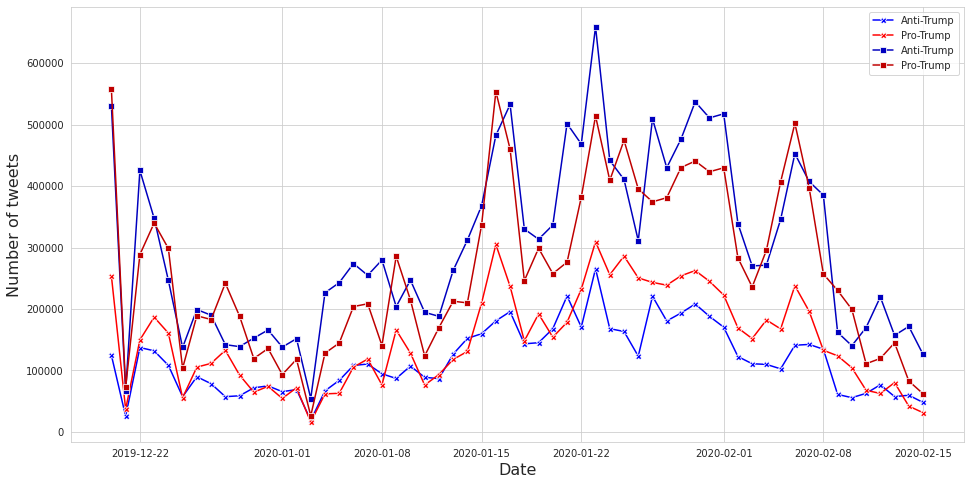

In [ ]:
#Plot number of tweets per day, humans vs bots, pro vs anti Trump
#supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(16, 8))
plt.subplot(1,1,1)
#sns.lineplot(data = df_date,x='datetime', y = 'num_bot_tweets',ls= 'solid',marker= "o",label = 'Number of bots',color = 'purple')
sns.lineplot(data = df_date,x='datetime', y = 'num_bot_0_tweets',ls= 'solid',marker= "X",label = 'Anti-Trump',color = 'blue')
sns.lineplot(data = df_date,x='datetime', y = 'num_bot_1_tweets',ls= 'solid',marker= "X",label = 'Pro-Trump',color = 'red')
plt.ylabel("Number of bot tweets",fontsize = 16)
plt.xlabel("Date",fontsize = 16)
plt.legend()

#plt.subplot(2,1,2)
#sns.lineplot(data = df_date,x='datetime', y = 'num_human_tweets',ls= 'solid',marker= "s",label = 'Number of users',color = 'purple')
sns.lineplot(data = df_date,x='datetime', y = 'num_human_0_tweets',ls= 'solid',marker= "s",label = 'Anti-Trump',color = [0,0,.75])
sns.lineplot(data = df_date,x='datetime', y = 'num_human_1_tweets',ls= 'solid',marker= "s",label = 'Pro-Trump',color = [0.75,0,0])

plt.ylabel("Number of tweets",fontsize = 16)
plt.xlabel("Date",fontsize = 16)
plt.legend()
plt.show()

## Plot bot impact per day

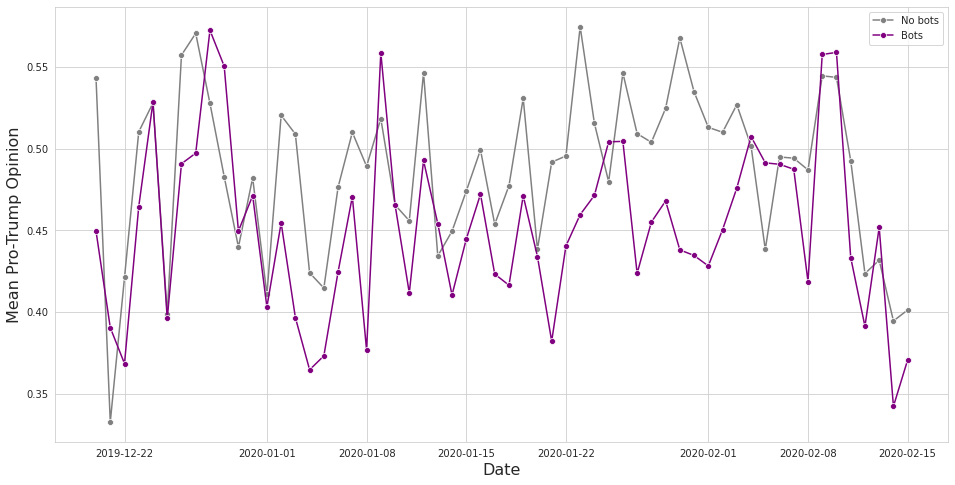

In [ ]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(data = df_date,x='datetime', y = 'mean_opinion_equilibrium_nobot', ls= 'solid',marker= "o", label = 'No bots', color = 'gray')
sns.lineplot(data = df_date,x='datetime', y = 'mean_opinion_equilibrium_bot', ls= 'solid',marker= "o", label = 'Bots', color = 'purple')
plt.ylabel("Mean Pro-Trump Opinion",fontsize = 16)
plt.xlabel("Date",fontsize = 16)

plt.legend()

Text(0.5, 0, 'Date')

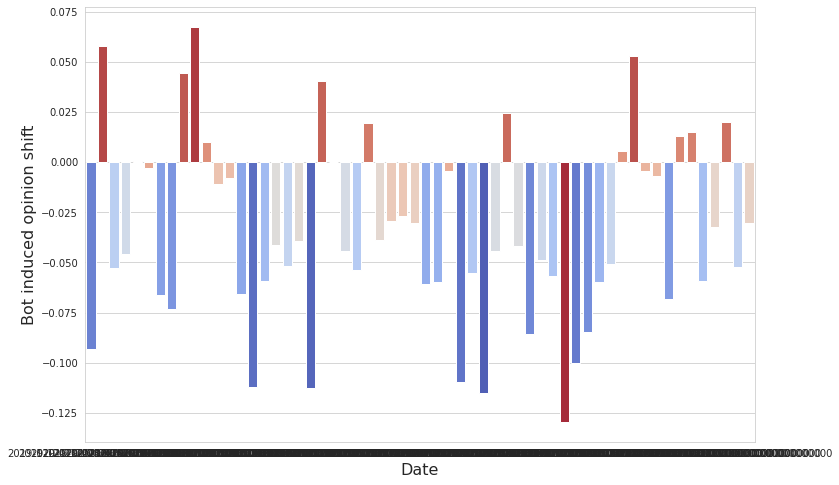

In [ ]:
df_date['opinion_shift'] = df_date.mean_opinion_equilibrium_bot - df_date.mean_opinion_equilibrium_nobot 
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(12, 8))
pal = sns.color_palette("coolwarm", len(df_date)) #https://seaborn.pydata.org/tutorial/color_palettes.html#diverging-color-palettes
rank = -df_date.opinion_shift.argsort().argsort()   # http://stackoverflow.com/a/6266510/1628638

sns.lineplot(data = df_date,x='datetime', y = 'opinion_shift')
sns.barplot(data = df_date,x='datetime', y = 'opinion_shift',  palette=np.array(pal[::-1])[rank])

plt.ylabel("Bot induced opinion shift",fontsize = 16)
plt.xlabel("Date",fontsize = 16)

## Plot bot reach

Plot number of unique followers of pro and anti-Trump bots



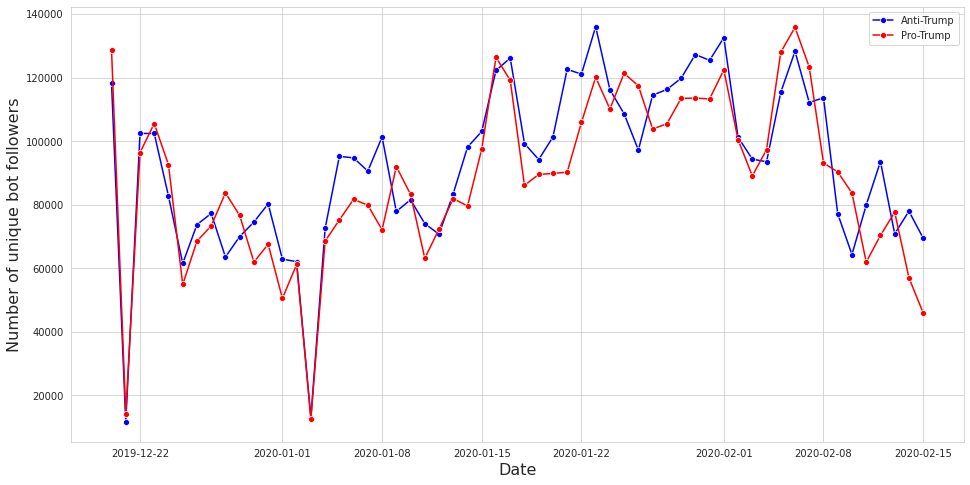

In [ ]:
sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(16, 8))
#sns.lineplot(data = df_date,x='datetime', y = 'num_bot_tweets',ls= 'solid',marker= "o",label = 'Number of bots',color = 'purple')
sns.lineplot(data = df_date,x='datetime', y = 'reach_bot_0',ls= 'solid',marker= "o",label = 'Anti-Trump',color = 'blue')
sns.lineplot(data = df_date,x='datetime', y = 'reach_bot_1',ls= 'solid',marker= "o",label = 'Pro-Trump',color = 'red')
plt.ylabel("Number of unique bot followers",fontsize = 16)
plt.xlabel("Date",fontsize = 16)
plt.legend()